**<font size="+3">08 Autokorrelation</font>**

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

In [4]:
pharma     = pd.read_csv(r'data/pharm-sales.csv',sep=';')  # Pharmaceutical Product Sales
pharma     = pharma.set_index('Week')
chemical   = pd.read_csv(r'data/chem-process.csv',sep=';') # Chemical Process Viscosity
chemical   = chemical.set_index('Time')
passengers = pd.read_csv('data/airline-passengers.csv', index_col='Month', parse_dates=True)

# Korrelation

https://de.wikipedia.org/wiki/Korrelation

**Korrelation**  
<ul>
<li>Übersetzung: Wechselbeziehung
<li>Ist ein Zusammenhangsmaß (sonst gibt es noch Lagemaße, Streuungsmaße)
<li>Positive Korrelation: steigt (sinkt) eine Variable macht das die andere auch
<li>Negative Korrelation: steigt (sinkt) eine Variable macht das die andere gerade anders
</ul>

**Bravais-Peason-Korrelationskoeffizient $r_{xy}$**   

<ul>
<li>es gibt auch andere Definitionen - das ist aber der Standard (daher kurz: Korrelationskoeffizient)</li>
<li>ist ein Maß für den LINEAREN Zusammenhang von Merkmalen</li>
<li>ist für numerische (intervall- oder verhältnisskaliert) Variable geeignet</li>
<li>Berechnung über Quotienten der emp. Kovarianz und dem Produkt der einzelnen emp. Standardabweichungen</li>
<li>der Nenner normiert das Ergebnis auf:</li>
</ul>

$\qquad -1 \le r_{xy} \le 1 $


$$
x: \text{Vektor mit $n$ Beobachtungen der ersten numerischen Variable}
$$
$$
y: \text{Vektor mit $n$ Beobachtungen der ersten numerischen Variable}
$$

$$
r_{xy} = Corr(x,y) = \frac{\sum\limits_{i=1}^n  (x_i - \bar{x})\; (y_i - \bar{y})  }
                 {\sqrt{\sum\limits_{i=1}^n (x_i-\bar{x})^2}\;
                  \sqrt{\sum\limits_{i=1}^n (y_i-\bar{y})^2} }
$$


**Ist die Kovarianz größer als Null, liegen $x_i$ und $y_i$ bei einem beliebigen Index $i$<br>
wahrscheinlich beide über ihrem Mittelwert $\bar{x},\bar{y}$ oder beide unter ihrem Mittelwert $\bar{x},\bar{y}$.**

# Autokorrelationsfunktion

https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f<br>
https://de.wikipedia.org/wiki/Autokorrelation<br>
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html

## Einleitung

**Autokorrelation**
<ul>
<li>ist eine Korrelation, die aus <b>einer</b> Zeitreihe berechnet wird
<li>"Auto": eine Zeitreihe wird mit einer eigenen zeitverschobenen Kopie verglichen
<li>Über die Periodenlänge hinaus ist im Allgemeinen die Korrelation umso geringer, je größer die Zeitverschiebung ist
</ul>

**Autokorrelationfunktion**
<ul>
<li>berechnet für jede Zeitverschiebung (Lag) die Korrelation
    <li><b>besitzt nur bei stationären Zeitreihen (zumindest ohne Trend) eine Aussagekraft</b>
</ul>


## Bestimmungsgleichungen

**Vorbemerkung: die Mittelwertbildung der Zeitreihe ($\bar{x}$) wird bei der Berechnung der ACF immer über alle $n$ Elemente von $x$ durchgeführt.**

**Berechnungsformel ACF:** 

$$
ACF_x(k) = \frac{\sum\limits_{i=1}^{n-k}  (x_{i+k} - \bar{x})\; (x_i - \bar{x})  }
                 { \sum\limits_{i=1}^n (x_i-\bar{x})^2}, \;\; k=0,1,\ldots,n-1.
$$

**Berechnung der ACF für $k =0$**

$$
ACF_x(k=0) = \frac{\sum\limits_{i=1}^{n}  (x_{i} - \bar{x})\; (x_i - \bar{x})  }
                 { \sum\limits_{i=1}^n (x_i-\bar{x})^2} = Corr(x,x) = 1
$$

**Betrachtung der ACF für $k =1$**

$$
ACF_x(k=1) = \frac{\sum\limits_{i=1}^{n-1}  (x_{i+1} - \bar{x})\; (x_i - \bar{x})  }
                 { \sum\limits_{i=1}^n (x_i-\bar{x})^2}
$$

**Berechnung der ACF für $k =n-1$**

$$
ACF_x(n) = \frac{\sum\limits_{i=1}^{1}  (x_{i+n-1} - \bar{x})\; (x_i - \bar{x})  }
                 { \sum\limits_{i=1}^n (x_i-\bar{x})^2} =
                 \frac{ (x_{n} - \bar{x})\; (x_1 - \bar{x})  }
                 { \sum\limits_{i=1}^n (x_i-\bar{x})^2} 
$$

$$\text{Der Zähler ergibt sich zu:}\;\; (x_2-\bar{x})(x_1-\bar{x}) + (x_3-\bar{x})(x_2-\bar{x}) + \ldots + (x_{n}-\bar{x})(x_{n-1}-\bar{x})$$

$x_{i+1}$ ist daher die um eine Einheit nach links verschobene Zeitreihe.  
Daher ist nur die Summe von $n-1$ Produkten möglich.  

Allgemein geht die Summation im Zähler bis $n-k$.  
Das ist ein Grund, warum die ACF für große Zeitverschiebungen immer kleiner wird.

## Minibeispiel

Gegeben ist die Zeitreihe $x$ mit $x_1= 3, x_2=4, x_3=2$.  
Der Mittelwert ergibt sich zu $\bar{x} = \frac{1}{3} (x_1 + x_2 + x_3) = 3$.  
Die Zeitreihe $x-\bar{x}$ hat die Werte: $(x_1-\bar{x})= 0,\; (x_2-\bar{x})=1,\; (x_3-\bar{x})=-1$.  
Der Nenner der ACF wird zu:  
$(x_1-\bar{x})^2 + (x_2-\bar{x})^2 + (x_3-\bar{x})^2 = (0)^2 + (1)^2 + (-1)^2 = 2$  

Der Zähler der ACF ist abhängig von $\tau$:  
$\tau=0$  
$(x_1-\bar{x})^2 + (x_2-\bar{x})^2 + (x_3-\bar{x})^2 = (0)^2 + (1)^2 + (-1)^2 = 2$  
$\tau=1$  
$(x_2-\bar{x})(x_1-\bar{x}) + (x_3-\bar{x})(x_2-\bar{x}) = (1)(0)+(-1)(1) = -1$  
$\tau=2$  
$(x_3-\bar{x})(x_1-\bar{x}) = (-1)(0) = 0$

Damit besitzt die ACF die folgenden Werte:  
$ACF_x(0) =1$  
$ACF_x(1) = -0.5$  
$ACF_x(2) = 0$ 

In [5]:
acf([3,4,2])

array([ 1.00000000e+00, -5.00000000e-01, -1.42153377e-17])

## pharma und chemicals

### Datenplots

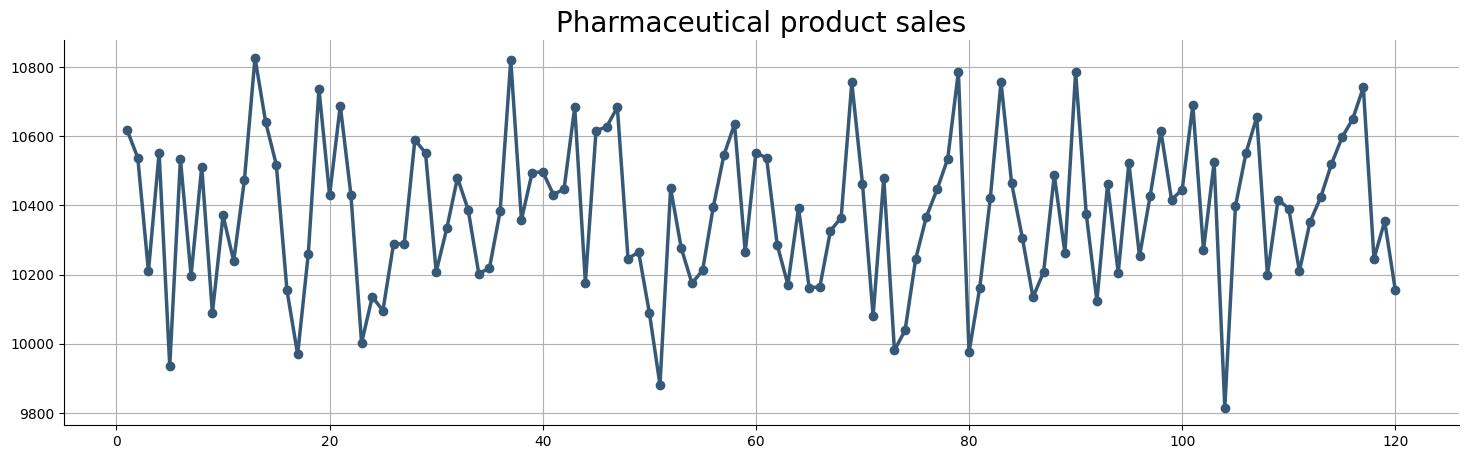

In [6]:
plt.title('Pharmaceutical product sales', size=20)
plt.plot(pharma, marker ='o')
plt.grid();

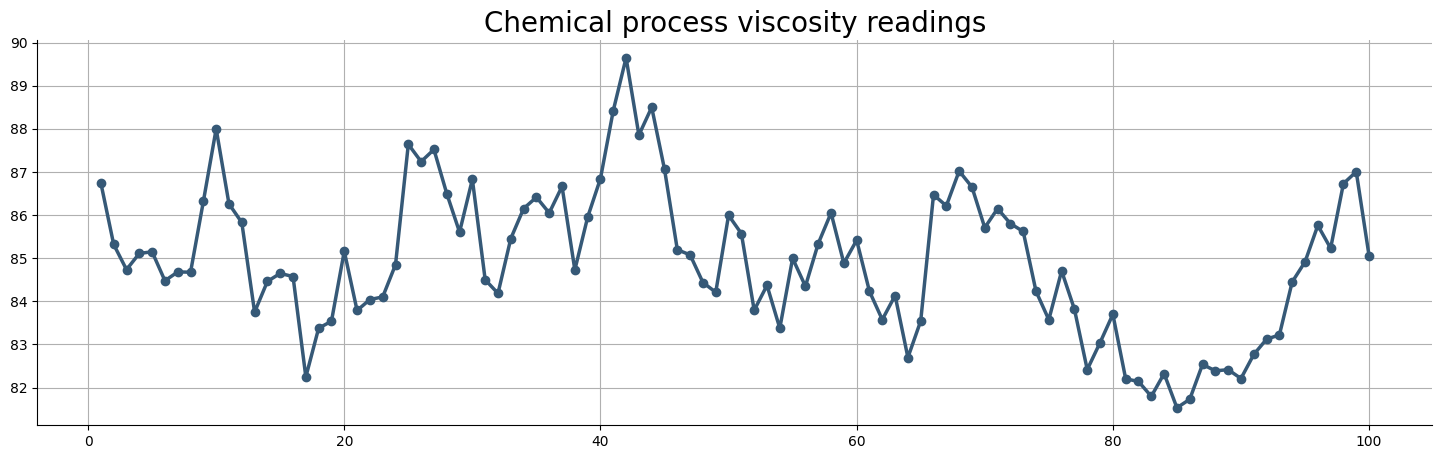

In [7]:
plt.title('Chemical process viscosity readings', size=20)
plt.plot(chemical, marker ='o')
plt.grid();

**Bei welchen der beiden Zeitreihen sind zeitlich benachbarte Beobachtungen positiv, gar nicht, oder negativ korreliert?**

### Lag Scatter Plot

**Lag Scatter Plot**  
<ul>
<li>Streudigramm
<li>den einzelnen Werte der Zeitreihe wird die Werte mit einem Lag $k$ gegenübergestellt
</ul>

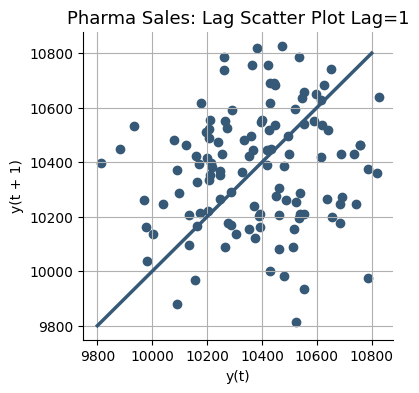

In [8]:
plt.rcParams["figure.figsize"] = (4,4)
plt.title('Pharma Sales: Lag Scatter Plot Lag=1', size=13)
pd.plotting.lag_plot(pharma, lag=1)
plt.plot([9800,10800],[9800,10800])
plt.grid();

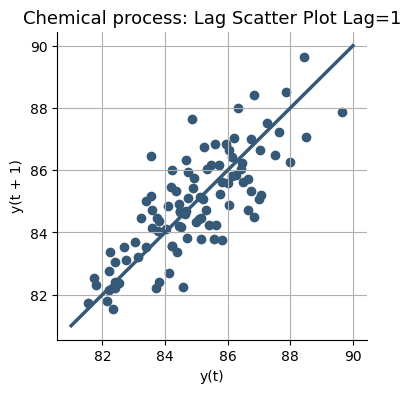

In [9]:
plt.rcParams["figure.figsize"] = (4,4)
plt.title('Chemical process: Lag Scatter Plot Lag=1', size=13)
pd.plotting.lag_plot(chemical, lag=1)
plt.plot([81,90],[81,90])
plt.grid();

**Analyse der Lag Scatter Plots**  
<ul>
<li>Kleine Werte von $y_t$: in welchem Wertebereich liegen die Folgewerte?
<li>Große Werte von $y_t$: in welchem Wertebereich liegen die Folgewerte?
<li>Ist der Wertebereich der Folgewerte unabhängig von $y_t$ -> keine Korrelation
<li>Ist der Wertebereich der Folgewerte abhängig von $y_t$ -> Korrelation
<li>je näher die Punkte an der Winkelablierenden, desto näher Korrelation bei +1.

### ACF-Plots

https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html

* plottet die Werte der Autokorrelationsfunktion
* der ACF-Wert ist beim Lag 0 immer 1, und bei den anderen Lags immer kleiner
* die kleineren Lags sind interessant - es macht idR keinen Sinn, sich alle Lags (bis $n-1$) anzusehen
* alles Werte im grauen Bereich sind statistisch nicht signifikant (default Signifikanznivau = 0.05)<br>
  dh die Korrelationen sind nicht groß genug, um eine Korrelation ungleich 0 zu anzunehmen
* Niveau von 5%: bei 20 Lags ist zu erwarten, dass eine Korrelation (etwas) außerhalb des grauen Bereichs ist

In [10]:
rcParams['figure.figsize'] = 18, 7

In [11]:
# Die ersten 20 Werte der Autokorrelationsfunktion acf() als formatierte Liste
print( ["%.2f" % member for member in acf(pharma, nlags=20)] )

['1.00', '0.11', '0.01', '-0.22', '-0.19', '-0.11', '0.01', '0.08', '0.05', '0.00', '-0.06', '-0.02', '-0.02', '-0.09', '-0.03', '0.06', '-0.00', '-0.03', '0.11', '0.03', '-0.04']


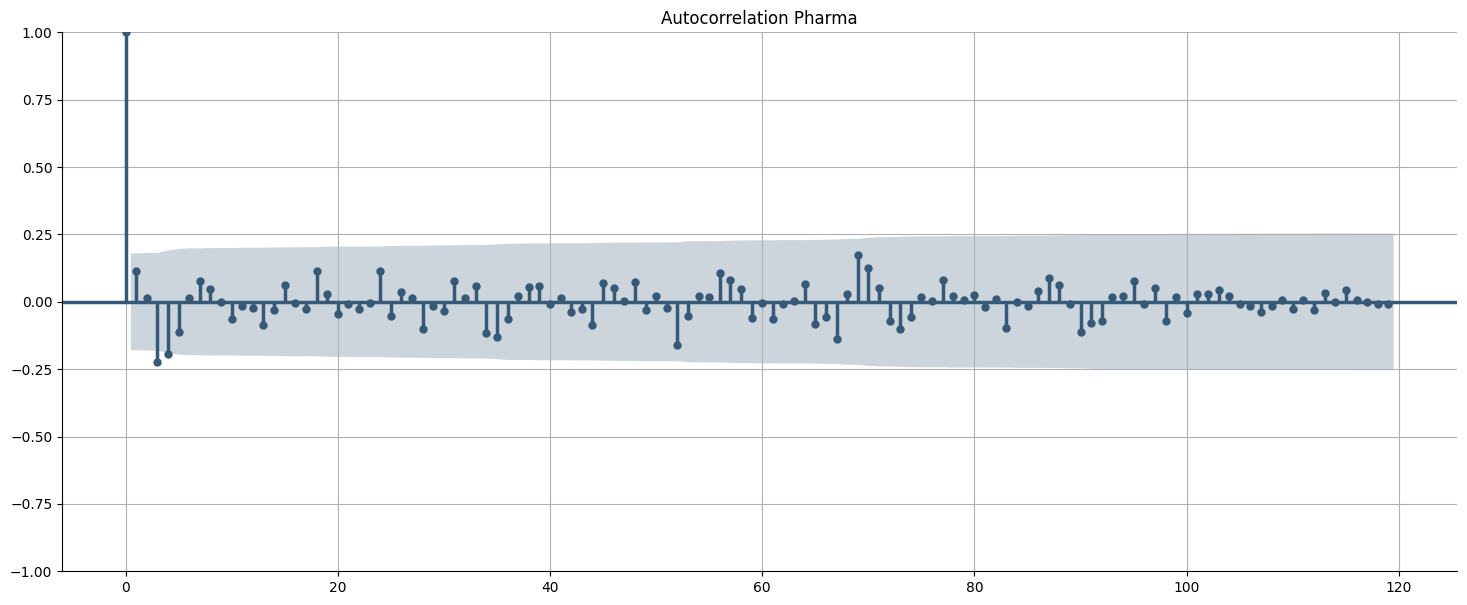

In [12]:
plot_acf(pharma, lags=119, title='Autocorrelation Pharma',)
plt.grid();

<b>Praktisch keine Korrelationen vorhanden:</b><br>
Die Werte zeitlicher benachbarter Datenpunkte sind nicht voneinander abhängig<br>
Die Werte mit einem bestimmten Lag-Abstand auch nicht => keine Saisonkomponente<br>
Bspw.: keine Unterschiede Sommer/Winter, Monatsmitte/ende, ....

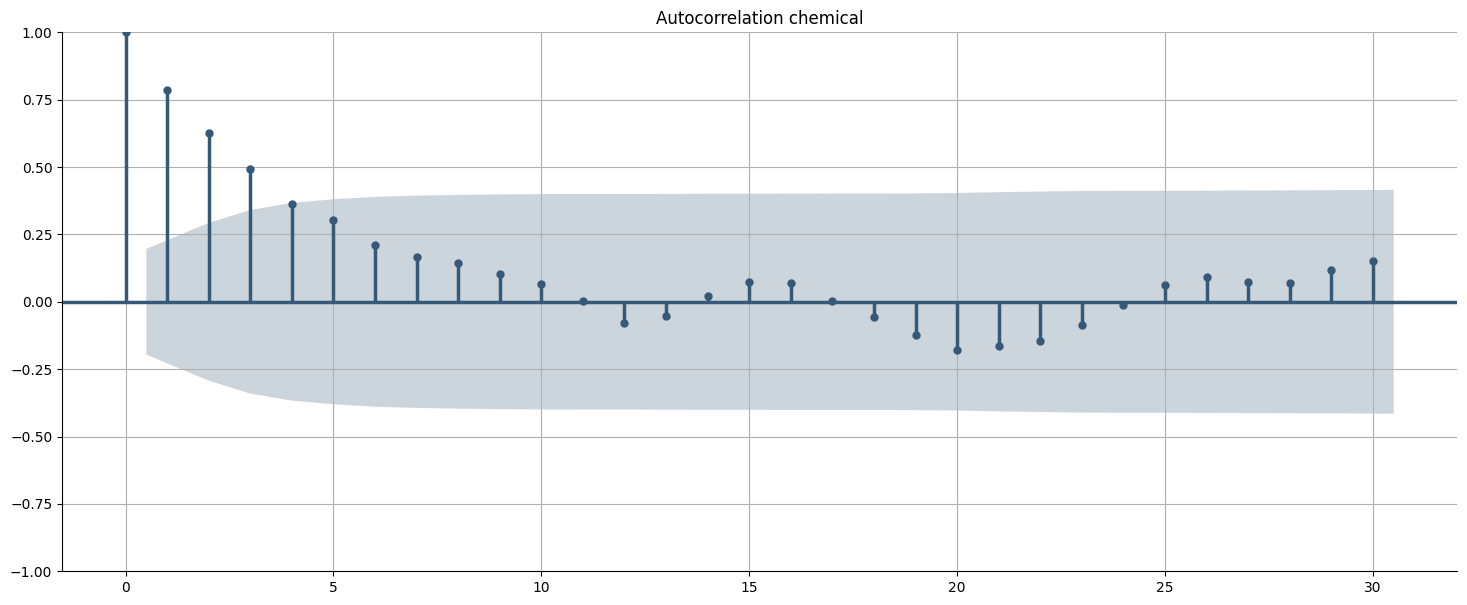

In [13]:
plot_acf(chemical, lags=30, title='Autocorrelation chemical',)
plt.grid();

* Es gibt Korrelationen bei kleinen Lags, die mit zunehmender Lagzahl kleiner werden.<br>
* Es gibt keine signifikanten Korrelationen bei größeren Lags.<br>
* Der Wert zu einem Zeitpunkt ist ähnlich dem Wert des vorherigen Zeitpunkts.<br>
* Je größer der zeitliche Abstand desto mehr sind die Werte entkoppelt.<br>
* Es lohnt sich nicht, über Werte innerhalb des grauen Feldes zu diskutieren.

## passengers

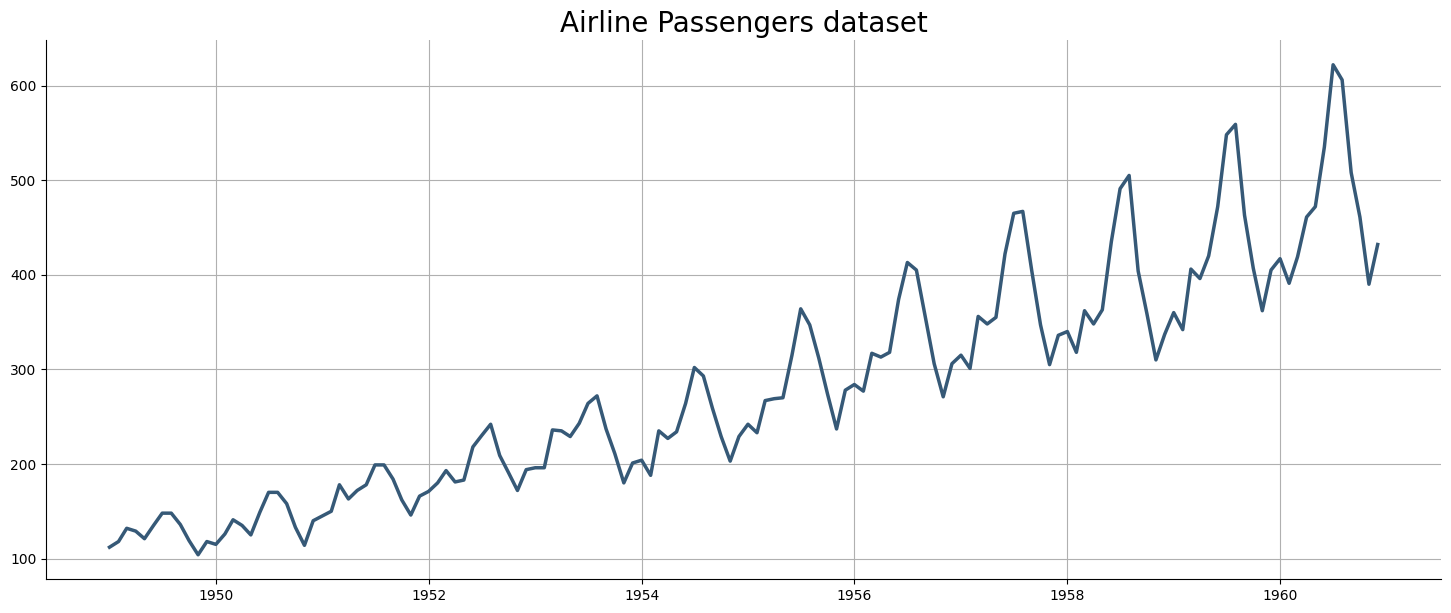

In [14]:
# Visualize
plt.title('Airline Passengers dataset', size=20)
plt.plot(passengers.index,passengers.Passengers)
plt.grid();

Die Autokorrelationsfunktion kann dabei die folgenden Fragen beantworten:
<ul>
<li>Wie stark sind die Passagierzahlen eines Monats mit denen des vorherigen Monats verbunden?
<li>Wie stark sind die Passagierzahlen eines Monats mit denen vor genau einem Jahr verbunden?
</ul>

**Zunächst wird die Differenz erster Ordnung durchgeführt, um die Zeitreihe stationär zu machen.**

In [15]:
# First-order difference
passengers['Passengers_diff1'] = passengers.Passengers.diff(periods=1)

In [16]:
passengers

,Passengers,Passengers_diff1
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


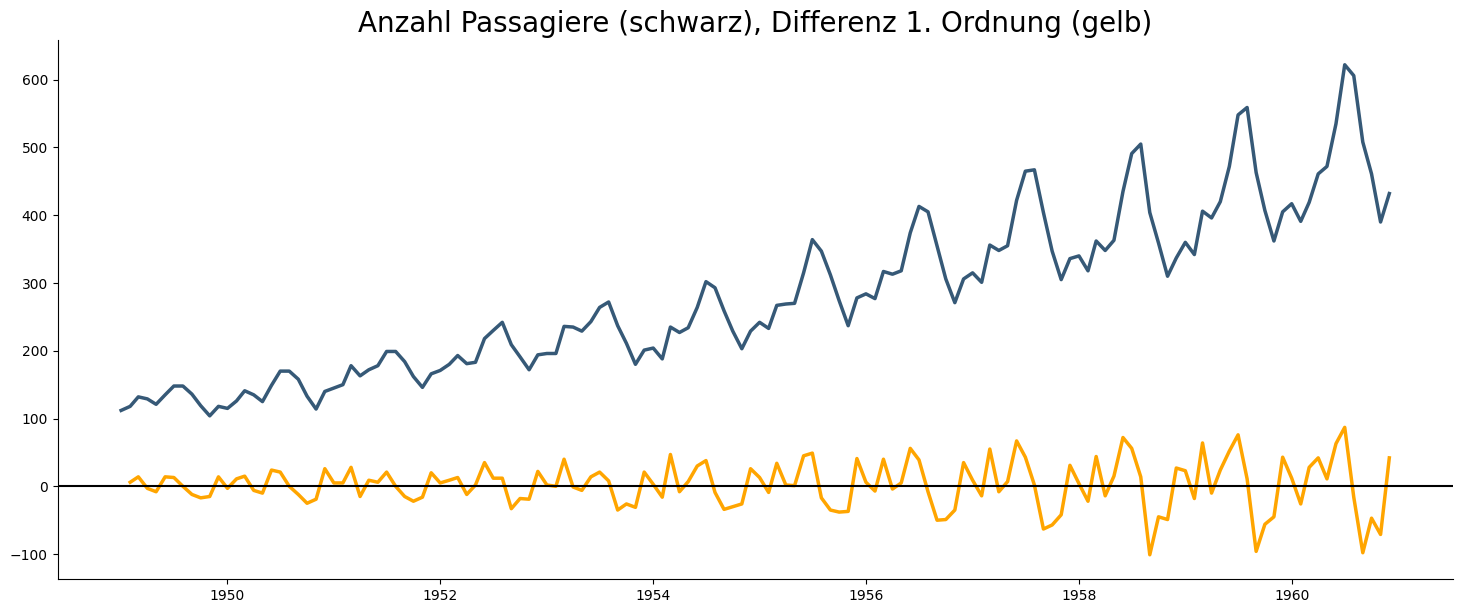

In [17]:
# Plot
plt.title('Anzahl Passagiere (schwarz), Differenz 1. Ordnung (gelb)', size=20)
plt.plot(passengers.Passengers, label='Passengers')
plt.plot(passengers.Passengers_diff1, label='First-order difference', color='orange')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5);

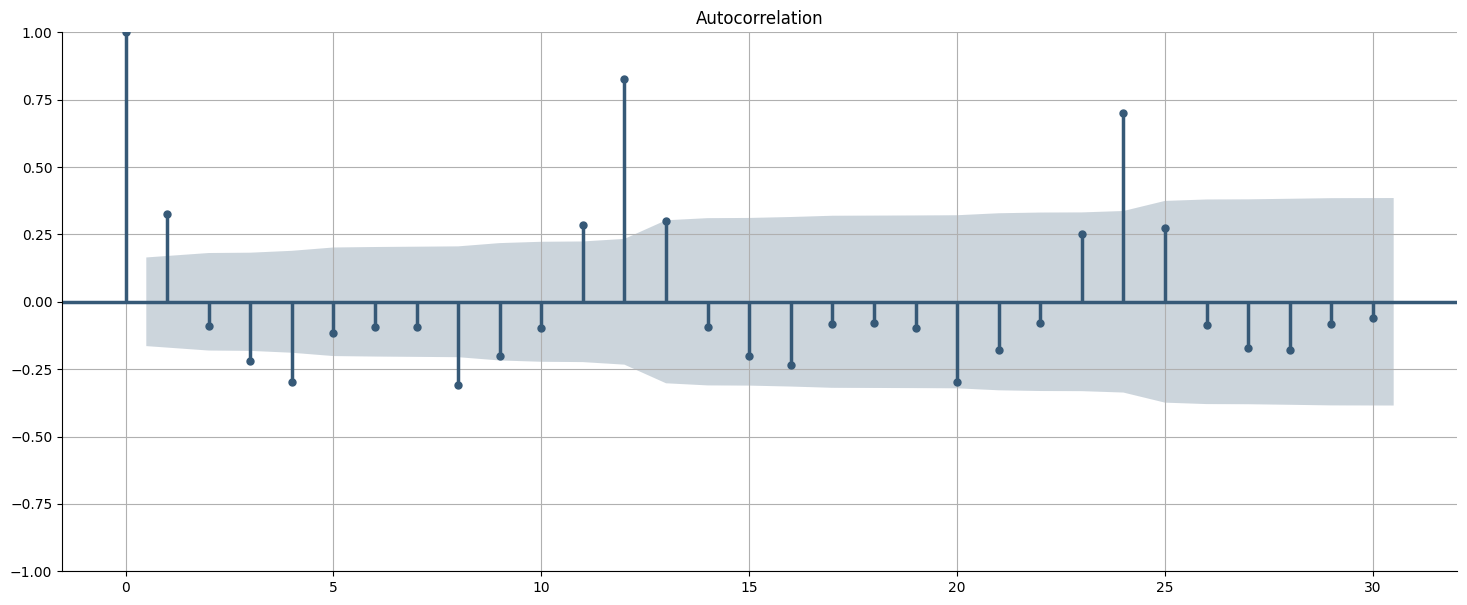

In [18]:
# Plot autocorrelation
plot_acf(passengers.Passengers_diff1[1:-1], lags=30)
plt.grid();

**Interpretation**  
<ul>
<li>Die Monatzahlen besitzen eine große Korrelation zu den Monatszahlen ein Jahr davor.
<li>Die Monatzahlen besitzen eine gewisse Korrelation zu den Vormonatszahlen.
<li>Die Monatzahlen besitzen eine gewisse Korrelation zu Zahlen vier Monate vorher.<br>
    Vier Monate ist gerade der Abstand zwischen Minimum und Maximum der Saisonkomponente....

**Das Folgende passiert, wenn man nicht auf die Stationarität achtet....**

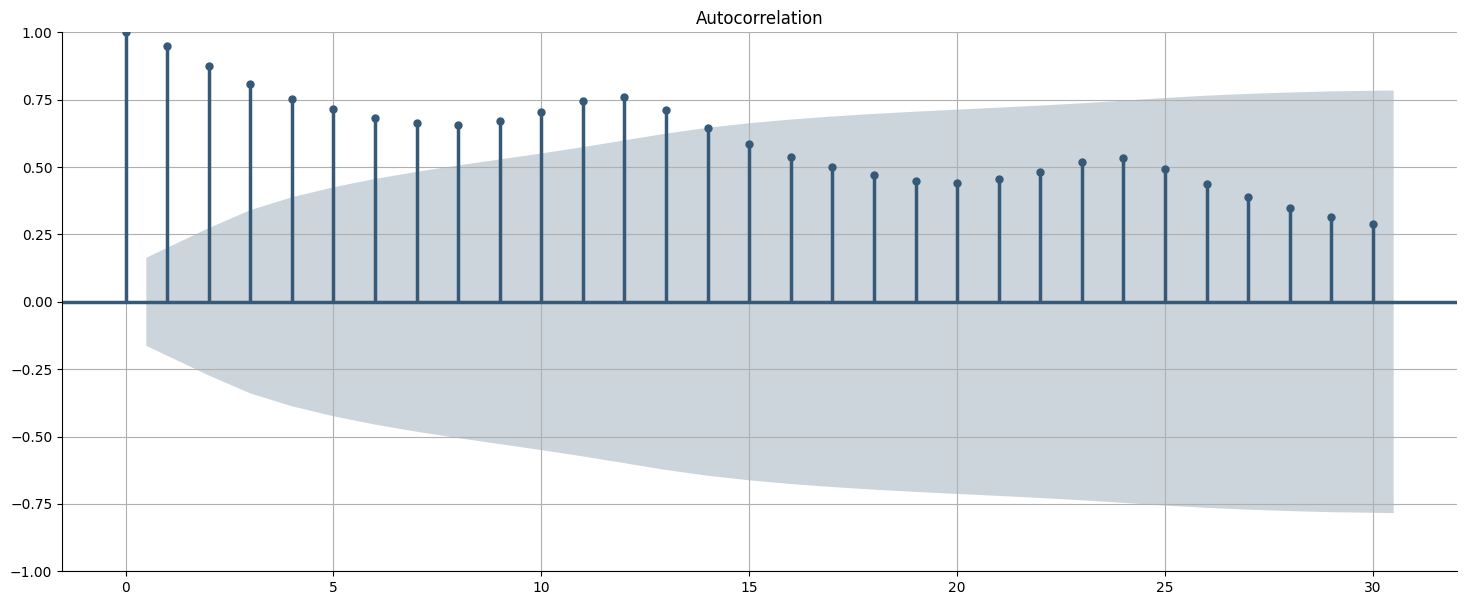

In [19]:
# Plot autocorrelation
plot_acf(passengers.Passengers, lags=30)
plt.grid();

# Partielle Autokorrelationsfunktion

https://de.wikipedia.org/wiki/Partielle_Autokorrelationsfunktion

**Partielle Autokorrelationsfunktion (PACF)**  
<ul>
<li>identifiziert auch Abhängigkeiten zwischen den Werten einer Zeitreihe zu unterschiedlichen Zeiten
<li>dabei ohne den Einflusses der zeitlich dazwischen liegenden Variablen
<li>nur der direkte Effekt um eine bestimmte Zeit verschobenen Werte wird ermittelt
<li>es gibt keine einfache Formel dafür</ul>

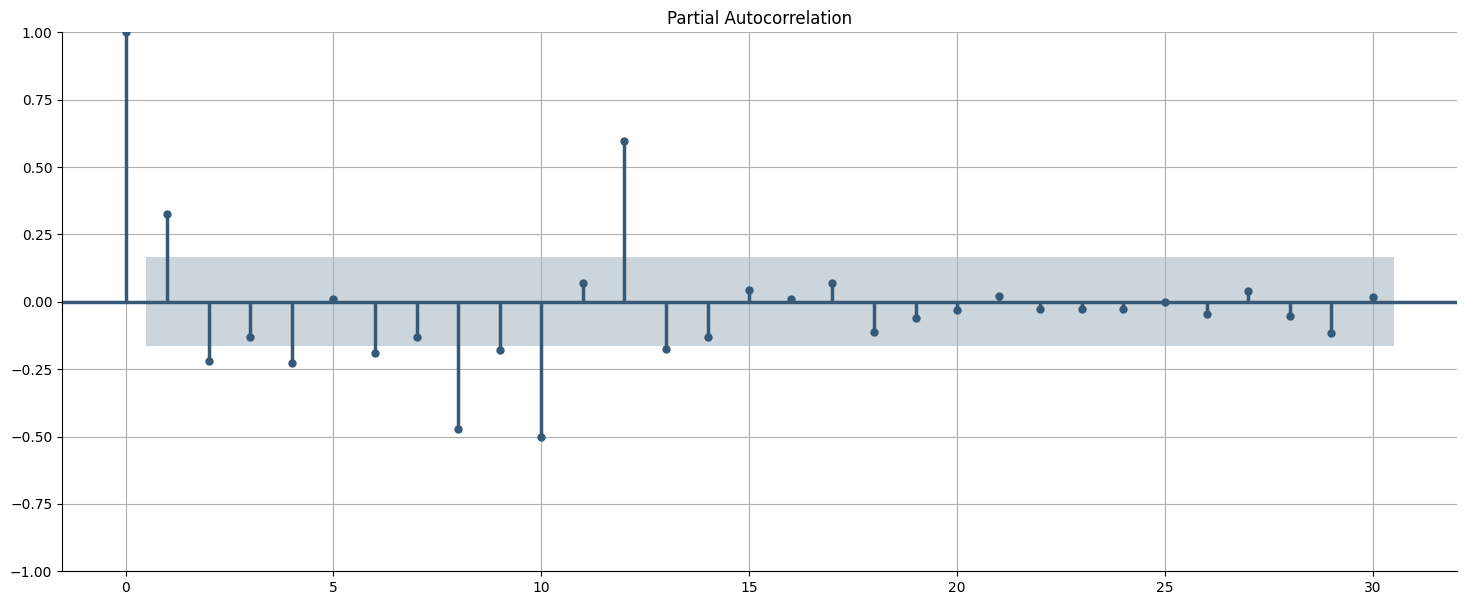

In [20]:
# Plot partial autocorrelation
plot_pacf(passengers.Passengers_diff1[1:-1], lags=30)
plt.grid();

Die Korrelation beim Lag 24 ist hier nicht mehr zu sehen.  

# Konklusio

<ul>
<li>ACF und PACF sind eine Möglichkeit, Zeitreihen zu analysieren
<li>beide sollten nur bei stationären Zeitreihen verwendet werden
<li>wie stark hängen benacbarte Werte voneinander ab?
<li>gibt es ein saisonales Verhalten - mit welchen Periodenlängen?
</ul>